Universidad Galileo

Data Science at Work

PAPD - Sección V

Allied Global - Grupo 1.2


# Análisis Exploratorio de Datos

Se entregaron 4 datasets:
- Empleados_amonestaciones.csv
- Empleados_planificacion_horarios.csv
- Empleados_vacaciones.csv
- Top_performers_2017_2020.csv

### Empleados_amonestaciones.csv

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
amonestaciones = pd.read_csv('D:/OneDrive - Universidad Galileo/Data Science/Python/Proyectos/Galileo/Data Science at Work/Empleados_allied/Empleados_amonestaciones.csv')
amonestaciones

,Codigo_Empleado,NombrePais,Cuenta,Estatus_Empleado,PUESTO,SITE,Tipo_Amonestacion,Amonestaciones,Fecha_Amonestacion
0,A13E00B085,Guatemala,TRACFONE QAI,Renuncia,ANALISTA,VALLE DEL SOL CENTRAL,Escrita,Indisciplina,2015-04-01
1,A13E00B085,Guatemala,TRACFONE QAI,Renuncia,ANALISTA,VALLE DEL SOL CENTRAL,Escrita,Normas PCI,2015-04-15
2,A13E00B085,Guatemala,TRACFONE QAI,Renuncia,ANALISTA,VALLE DEL SOL CENTRAL,Escrita,Procedimiento Incorrecto,2015-04-29
3,A13E00B085,Guatemala,TRACFONE QAI,Renuncia,ANALISTA,VALLE DEL SOL CENTRAL,Verbal,Procedimiento Incorrecto,2015-11-25
4,1819020B02,Guatemala,TRACFONE GUATEMALA,Fallecimiento,ASESOR TELEFONICO III,PACIFIC II,Verbal,Ausencia de Labores,2012-02-07
...,...,...,...,...,...,...,...,...,...
87327,155437A321,Guatemala,TRAVEL PASS GROUP GUATEMALA,Abandono,ASESOR TELEFONICO II,PLAZA ZONA 4,Escrita,Ausencia de Labores,2020-08-11
87328,1FBDDF9869,Guatemala,TRAVEL PASS GROUP GUATEMALA,Abandono,ASESOR TELEFONICO II,PLAZA ZONA 4,Verbal,Ausencia de Labores,2020-08-09
87329,1FBDDF9869,Guatemala,TRAVEL PASS GROUP GUATEMALA,Abandono,ASESOR TELEFONICO II,PLAZA ZONA 4,Escrita,Ausencia de Labores,2020-08-16
87330,753D0C1B60,Guatemala,BANRURAL GUATEMALA,Activo,ASESOR TELEFONICO I,PLAZA ZONA 4,Verbal,Ausencia de Labores,2020-09-05


### Valores Nulos

In [17]:
amonestaciones.isnull().mean()

Codigo_Empleado       0.000000
NombrePais            0.000000
Cuenta                0.000000
Estatus_Empleado      0.000000
PUESTO                0.000000
SITE                  0.027951
Tipo_Amonestacion     0.000000
Amonestaciones        0.000000
Fecha_Amonestacion    0.000000
dtype: float64

El dataset se encuentra completo, a excepción de SITE, con aproximadamente 2.8% de valores faltantes.

In [19]:
# Se separará el conjunto en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    amonestaciones,
    amonestaciones['Estatus_Empleado'], # target
    test_size=0.3, # porcentaje de observaciones en el conjnto de prueba
    random_state=0) # semilla para reproducibilidad

X_train.shape, X_test.shape

((61132, 9), (26200, 9))

### Estatus_Empleado

Text(0, 0.5, 'Frecuencia')

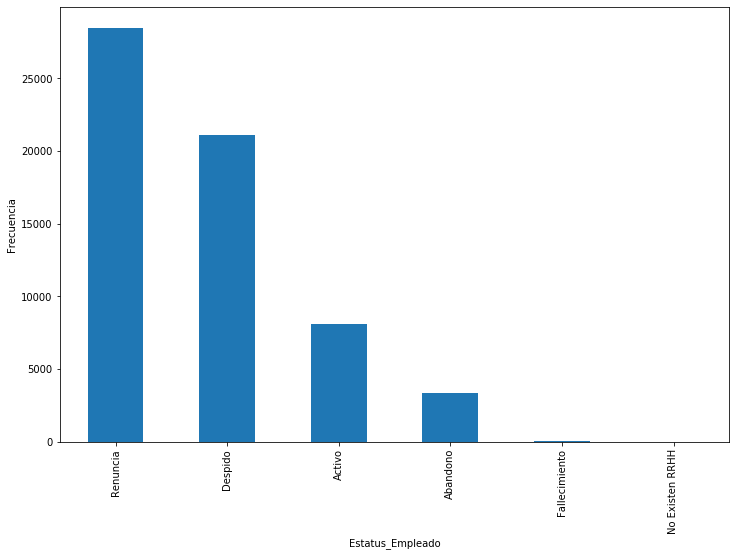

In [42]:
# Se inspecciona el número de observaciones por categoría en Estatus Empleado
plt.figure(figsize=(12,8))
X_train['Estatus_Empleado'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Estatus_Empleado')
plt.ylabel('Frecuencia')

Se filtrarán entonces los casos de bajas en total, por causas que son voluntarias, como todas aquellas observaciones en las que existió una renuncia, un despido o un abandono.

In [61]:
Filtro_Bajas = (X_train['Estatus_Empleado']=='Renuncia') | (X_train['Estatus_Empleado']=='Despido') | (X_train['Estatus_Empleado']=='Abandono')
X_train_Bajas = X_train[Filtro_Bajas]
X_train

,Codigo_Empleado,NombrePais,Cuenta,Estatus_Empleado,PUESTO,SITE,Tipo_Amonestacion,Amonestaciones,Fecha_Amonestacion
73969,0E9D082CC6,Guatemala,HOVER GUATEMALA,Renuncia,MODELADOR DIGITAL,PACIFIC II,Verbal,Ausencia de Labores,2017-05-19
42558,2EE2B82AF4,Honduras,ATC HONDURAS -HORAS,Renuncia,ASESOR TELEFONICO I,ALTIA,Verbal,Mal Rendimiento,2016-04-21
53138,2AB0EBDE9C,Guatemala,CLARO GUATEMALA,Activo,ASESOR TELEFONICO II,WORK FROM HOME GT,Escrita,Ausencia de Labores,2016-12-17
40704,4B30AC9887,Honduras,ATC HONDURAS -HORAS,Despido,ASESOR TELEFONICO I,ALTIA,Escrita,Mal Rendimiento,2016-04-12
73999,DC72D5EE75,Guatemala,CLARO GUATEMALA,Renuncia,ASESOR TELEFONICO II,PLAZA ZONA 4,Suspension Disciplinaria sin goce,Baja Nota de Calidad,2018-03-15
...,...,...,...,...,...,...,...,...,...
21243,BFF23D5F94,Guatemala,TRACFONE GUATEMALA,Renuncia,ASESOR TELEFONICO I,PACIFIC II,Escrita,Llegadas Tarde,2015-03-04
45891,3AD933A1F8,Guatemala,CLARO GUATEMALA,Activo,ASESOR TELEFONICO II,PLAZA ZONA 4,Escrita,Baja Nota de Calidad,2018-04-08
42613,6027B8CFB5,Honduras,ATC HONDURAS -HORAS,Renuncia,ASESOR TELEFONICO I,GALERIAS,Verbal,Mal Rendimiento,2016-06-15
43567,48B508B648,Guatemala,CLARO GUATEMALA,Renuncia,ASESOR TELEFONICO II,PLAZA ZONA 4,Escrita,Llegadas Tarde,2014-08-20


### Principales Causas de Baja

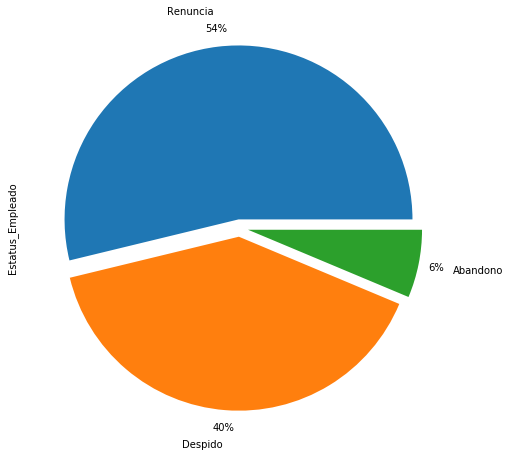

In [85]:
# Se inspeccionan las causas de Bajas controlables
plt.figure(figsize=(12,8))
explode = (0.05, 0.05, 0.05)
X_train_Bajas['Estatus_Empleado'].value_counts().sort_values(ascending=False).plot.pie(explode=explode,autopct='%1.0f%%',pctdistance=1.1,labeldistance=1.2)

Se encuentran dos causas principales de baja:
- Renuncia
- Despido

Para cada una de estas causas se explorarán las categorías en el dataset.

# Renuncia

### Amonestaciones

In [181]:
Filtro_Renuncia = (X_train_Bajas['Estatus_Empleado']=='Renuncia')

In [182]:
X_train_Renuncia = X_train_Bajas[Filtro_Renuncia]
X_train_Renuncia

,Codigo_Empleado,NombrePais,Cuenta,Estatus_Empleado,PUESTO,SITE,Tipo_Amonestacion,Amonestaciones,Fecha_Amonestacion
73969,0E9D082CC6,Guatemala,HOVER GUATEMALA,Renuncia,MODELADOR DIGITAL,PACIFIC II,Verbal,Ausencia de Labores,2017-05-19
42558,2EE2B82AF4,Honduras,ATC HONDURAS -HORAS,Renuncia,ASESOR TELEFONICO I,ALTIA,Verbal,Mal Rendimiento,2016-04-21
73999,DC72D5EE75,Guatemala,CLARO GUATEMALA,Renuncia,ASESOR TELEFONICO II,PLAZA ZONA 4,Suspension Disciplinaria sin goce,Baja Nota de Calidad,2018-03-15
83574,8C6D4C22CD,Guatemala,HOVER GUATEMALA,Renuncia,MODELADOR DIGITAL,PLAZA ZONA 4,Verbal,Ausencia de Labores,2019-01-20
55605,B7A67633EE,Honduras,TRAVEL PASS GROUP HONDURAS-HORAS,Renuncia,ASESOR TELEFONICO II,ALTIA,Verbal,Baja Nota de Calidad,2017-03-16
...,...,...,...,...,...,...,...,...,...
86293,73190BAE85,Guatemala,SIRIUS XM,Renuncia,ASESOR TELEFONICO I,PACIFIC II,Written,Late Entry,2019-11-14
41993,33649064CD,Honduras,TRAVEL PASS GROUP HONDURAS-HORAS,Renuncia,ASESOR TELEFONICO II,ALTIA,Suspension Disciplinaria sin goce,Ausencia de Labores,2016-08-18
21243,BFF23D5F94,Guatemala,TRACFONE GUATEMALA,Renuncia,ASESOR TELEFONICO I,PACIFIC II,Escrita,Llegadas Tarde,2015-03-04
42613,6027B8CFB5,Honduras,ATC HONDURAS -HORAS,Renuncia,ASESOR TELEFONICO I,GALERIAS,Verbal,Mal Rendimiento,2016-06-15


In [186]:
def pareto(dataframe,categorias):
    plt.figure(figsize=(12,8))
    sizes = [15, 30, 45, 10]
    dataframe[categorias].value_counts().sort_values(ascending=False).plot.bar()

In [188]:
def cdf(dataframe,categorias):
    # Frecuencia
    stats_df = dataframe \
    .groupby(categorias) \
    [categorias] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {categorias: 'Frecuencia'}) \

    stats_df = stats_df.sort_values('Frecuencia',ascending=False)

    # PDF
    stats_df['pdf'] = stats_df['Frecuencia'] / sum(stats_df['Frecuencia'])

    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    stats_df

    stats_df.plot.bar(x = categorias, y = ['pdf', 'cdf'], grid = True,figsize=(12,8))
    

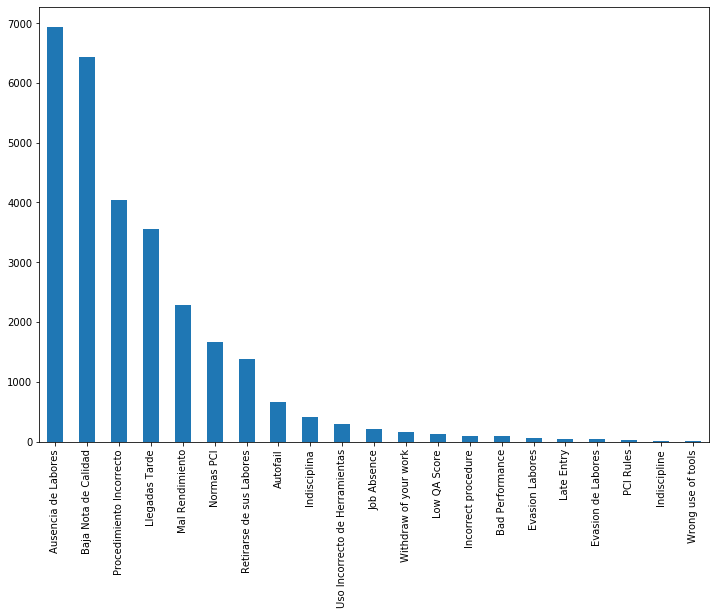

In [189]:
pareto(X_train_Renuncia,'Amonestaciones')

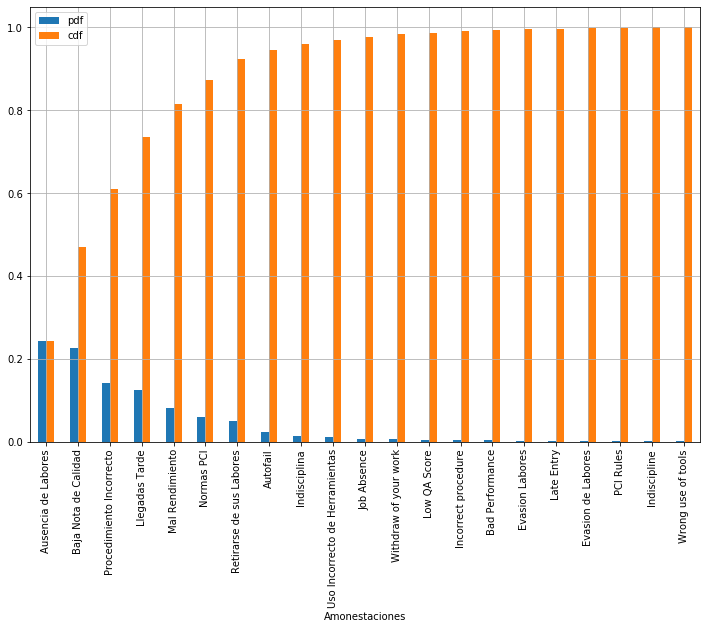

In [190]:
cdf(X_train_Renuncia,'Amonestaciones')

De este análisis, se encuentra que el 80% de las amonestaciones de las personas que renunciaron se deben a **Ausencia de Labores, Baja Nota de Calidad y Procedimiento Incorrecto**.

### Puestos

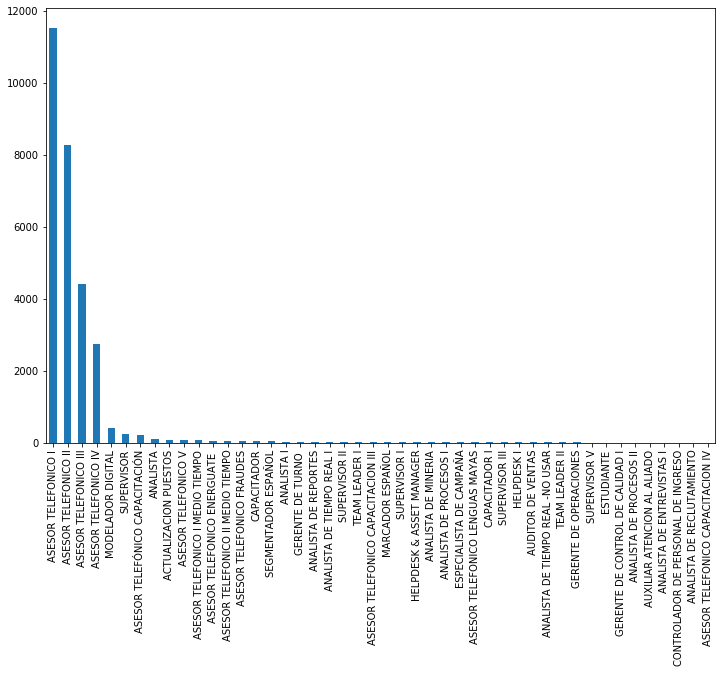

In [191]:
pareto(X_train_Renuncia,'PUESTO')

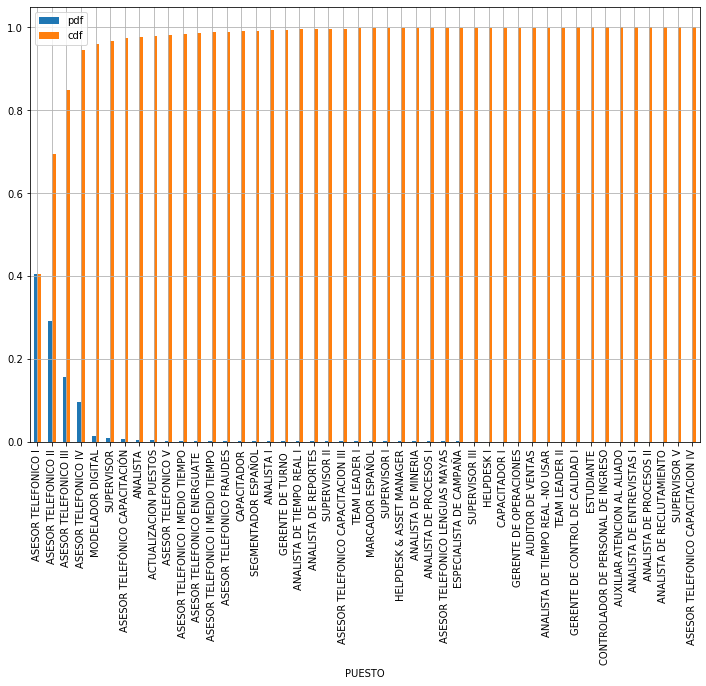

In [192]:
cdf(X_train_Renuncia,'PUESTO')

Los puestos que representan casi la totalidad de las renuncias son **Asesor Telefónico I, Asesor Telefónico II, Asesor Telefónico III y Asesor Telefónico IV**.

### Cuentas

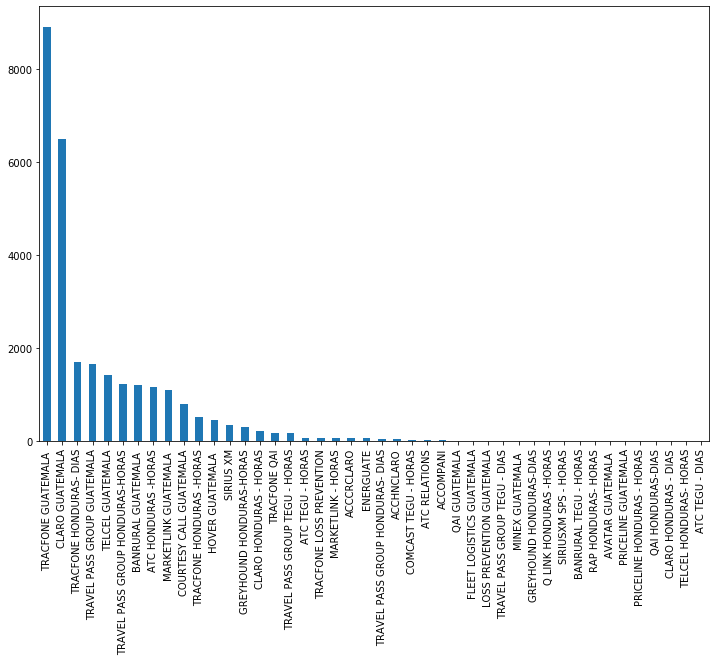

In [193]:
pareto(X_train_Renuncia,'Cuenta')

La cuenta **TRACFONE GUATEMALA** es la que históricamente registra mayor número de renuncias.

### Localización: Pais y Site

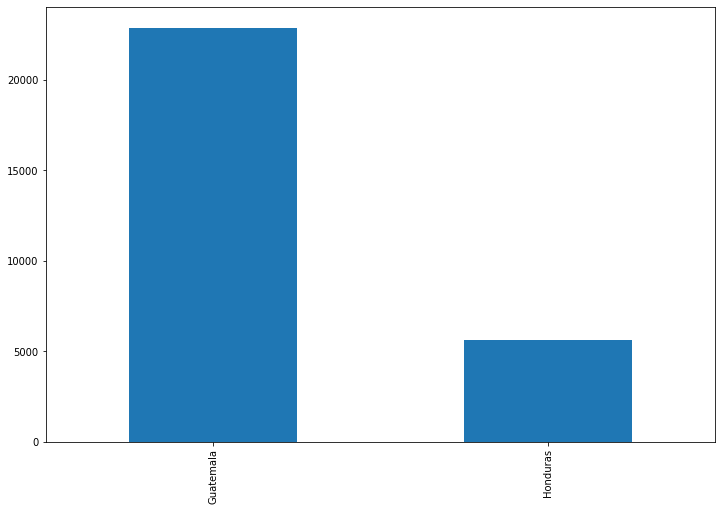

In [195]:
pareto(X_train_Renuncia,'NombrePais')

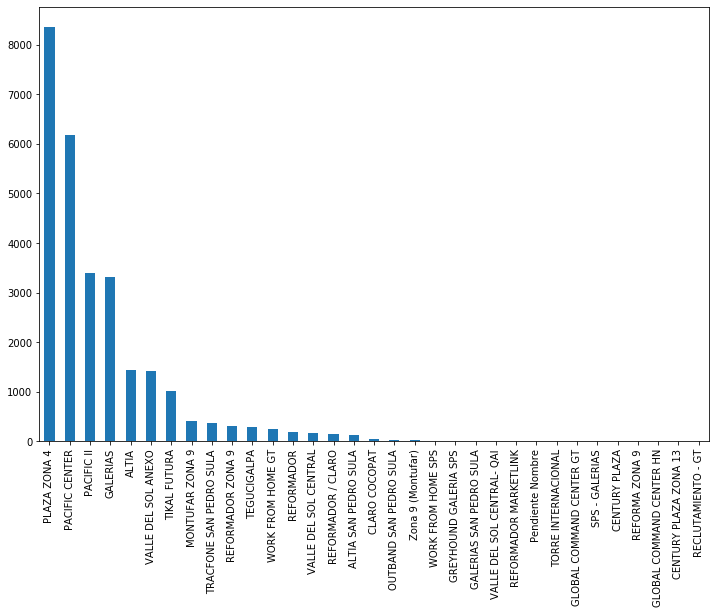

In [196]:
pareto(X_train_Renuncia,'SITE')

En **Guatemala, Plaza Zona 4** es la locación con mayor número de renuncias.



# Despidos

### Amonestaciones

In [197]:
Filtro_Despido = (X_train_Bajas['Estatus_Empleado']=='Despido')
X_train_Despido = X_train_Bajas[Filtro_Despido]
X_train_Despido

,Codigo_Empleado,NombrePais,Cuenta,Estatus_Empleado,PUESTO,SITE,Tipo_Amonestacion,Amonestaciones,Fecha_Amonestacion
40704,4B30AC9887,Honduras,ATC HONDURAS -HORAS,Despido,ASESOR TELEFONICO I,ALTIA,Escrita,Mal Rendimiento,2016-04-12
80915,4904F82C12,Honduras,ATC TEGU - HORAS,Despido,ASESOR TELEFONICO II,TEGUCIGALPA,Verbal,Ausencia de Labores,2020-01-07
63202,DF5042D2F1,Guatemala,TELCEL GUATEMALA,Despido,ASESOR TELEFONICO I,VALLE DEL SOL ANEXO,Suspension Disciplinaria sin goce,Mal Rendimiento,2016-07-12
60753,65B43FF2DE,Honduras,ATC HONDURAS -HORAS,Despido,ASESOR TELEFONICO I,GALERIAS,Escrita,Mal Rendimiento,2019-09-23
63962,94CD1A6636,Guatemala,TRAVEL PASS GROUP GUATEMALA,Despido,ASESOR TELEFONICO II,PLAZA ZONA 4,Escrita,Ausencia de Labores,2016-10-06
...,...,...,...,...,...,...,...,...,...
38804,2DA535AD78,Honduras,TRACFONE HONDURAS- DIAS,Despido,ASESOR TELEFONICO III,GALERIAS,Escrita,Ausencia de Labores,2015-09-23
6921,3722E31EAA,Guatemala,CLARO GUATEMALA,Despido,ASESOR TELEFONICO III,PLAZA ZONA 4,Suspension Disciplinaria sin goce,Ausencia de Labores,2013-12-23
82457,D12E7046AA,Guatemala,CLARO GUATEMALA,Despido,ASESOR TELEFONICO II,VALLE DEL SOL ANEXO,Suspension Disciplinaria sin goce,Baja Nota de Calidad,2019-11-22
80966,3DA0BC9626,Honduras,ATC HONDURAS -HORAS,Despido,ASESOR TELEFÓNICO CAPACITACIÓN,GALERIAS,Verbal,Ausencia de Labores,2020-03-09


### Amonestaciones

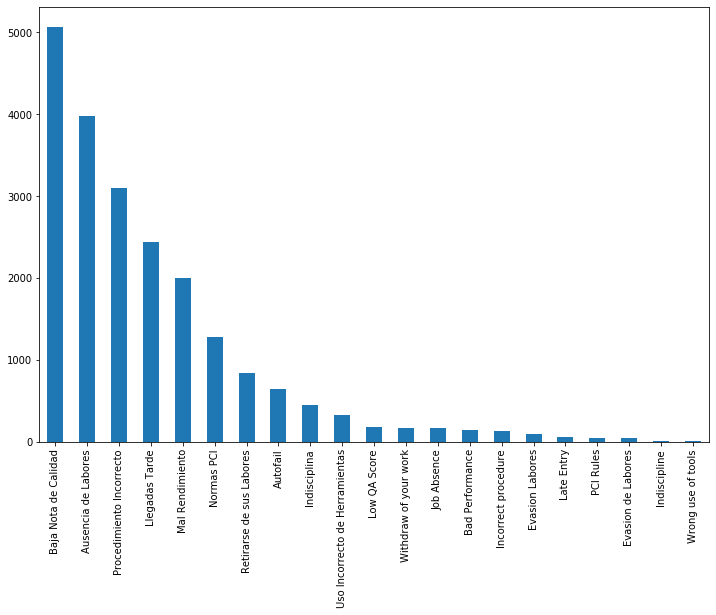

In [198]:
pareto(X_train_Despido,'Amonestaciones')

La principales causas de amonestación en la gente despedida es **Baja Nota de Calidad, Ausencia de Labores, Procedimiento Incorrecto**.

### Puestos

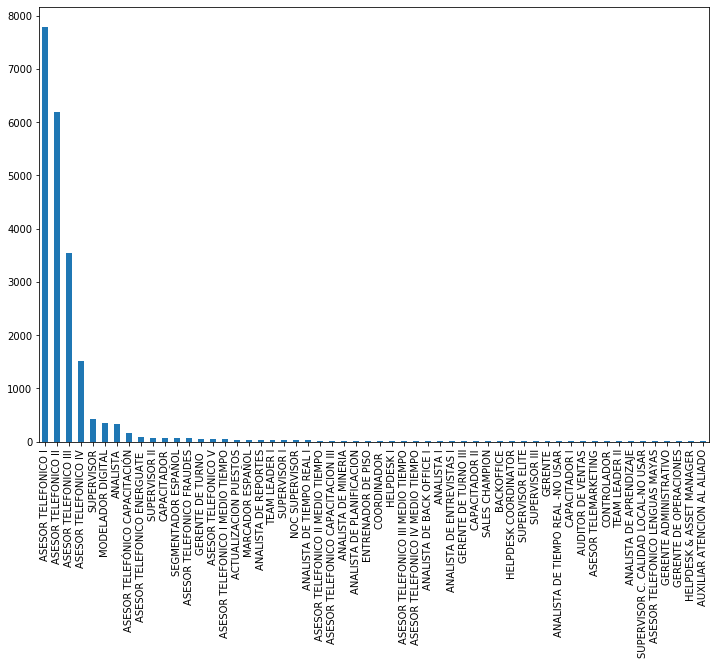

In [199]:
pareto(X_train_Despido,'PUESTO')

Los puestos que representan casi la totalidad de los despidos son **Asesor Telefónico I, Asesor Telefónico II, Asesor Telefónico III y Asesor Telefónico IV**.

### Cuentas

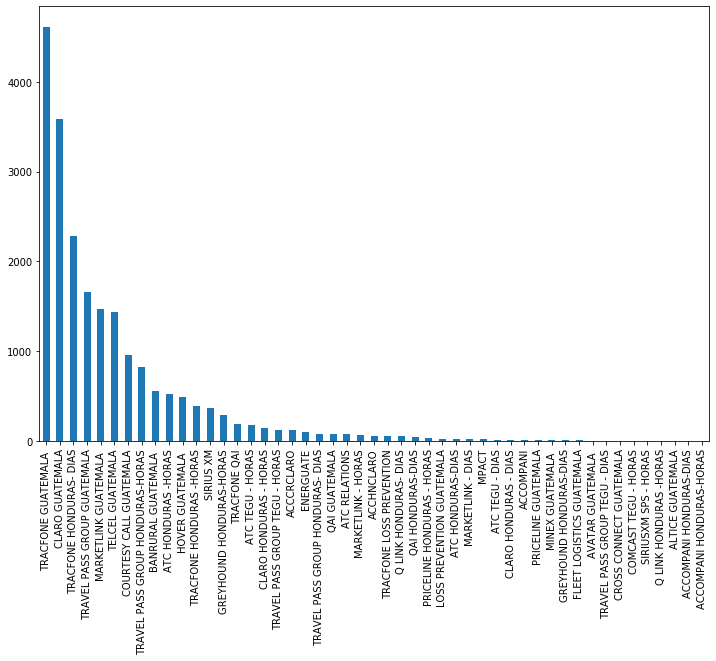

In [201]:
pareto(X_train_Despido,'Cuenta')

La cuenta **TRACFONE GUATEMALA** es la que históricamente registra mayor número de despidos.

### Localización: Pais y Site

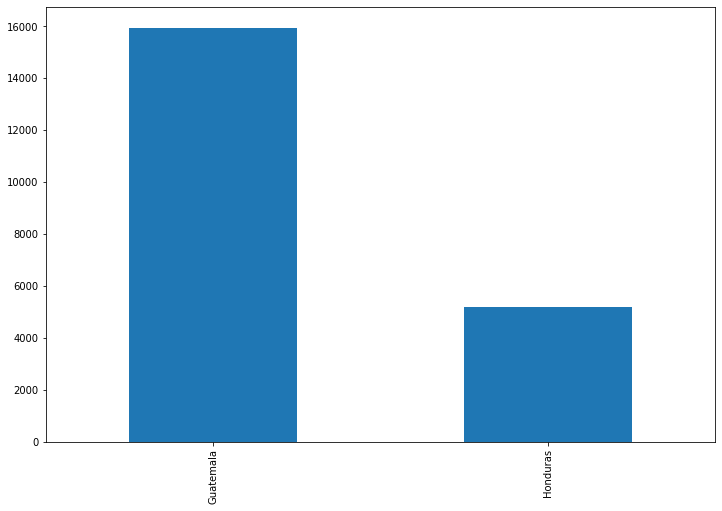

In [202]:
pareto(X_train_Despido,'NombrePais')

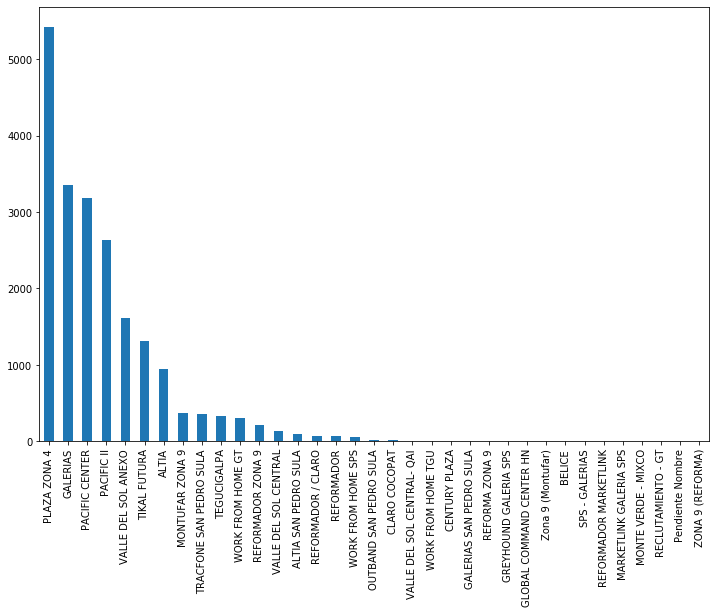

In [203]:
pareto(X_train_Despido,'SITE')

En **Guatemala, Plaza Zona 4** es la locación con mayor número de renuncias.

Ambos resultados muestran tendencias similares, por lo que se propone hacer ingeniería de características, con el objetivo de tomar en cuenta el número de personas asignadas a cada cuenta, sitio y puesto, con el objetivo de eliminar el efecto de volumen de empleados y pasar a índices.